# 1. Perkenalan

#### Nama: Muhamad Afif Thufail
#### Batch: FTDS 10
#### Dataset : 
#### HR Analytics: Employee Promotion Data

# 2. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import asarray
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import OutlierTrimmer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 3. Data Loading

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Terdapat 54808 baris dan 13 kolom pada dataset ini

Pada dataset ini terdapat 1 kolom bertipe float, 7 kolom bertipe integer dan 5 kolom bertipe object

In [5]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Terdapat mssing values pada kolom education atau pendidikan dan previous_year_ranting atau rating pada tahun sebelumnya

In [6]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Kolom awards_won? kemungkinan adalah kolom kategorikal. 

# 4. Exploratory Data Analysis

In [7]:
jumlah_target= data['is_promoted'].value_counts()
jumlah_target


0    50140
1     4668
Name: is_promoted, dtype: int64

<AxesSubplot:ylabel='is_promoted'>

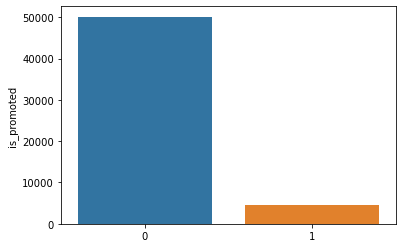

In [8]:
sns.barplot(x=jumlah_target.index, y=jumlah_target, orient='v')

Data pada kolom target menunjukkan data yang imbalance dimana data 0 lebih banyak 10 kali lipat dari data 1. Jadi dapat dikatakan data target ini adalah data yang imbalance.

Karana umunya yang dapat promosi itu sedikit maka dapat disimpulkan bahwa 0 adalah pegawai yang tidak dapat promosi, sementara 1 adalah pegawai yang mendapatkan promosi.

## Kolom Numerikal

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'awards_won?'}>],
       [<AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>, <AxesSubplot:>]],
      dtype=object)

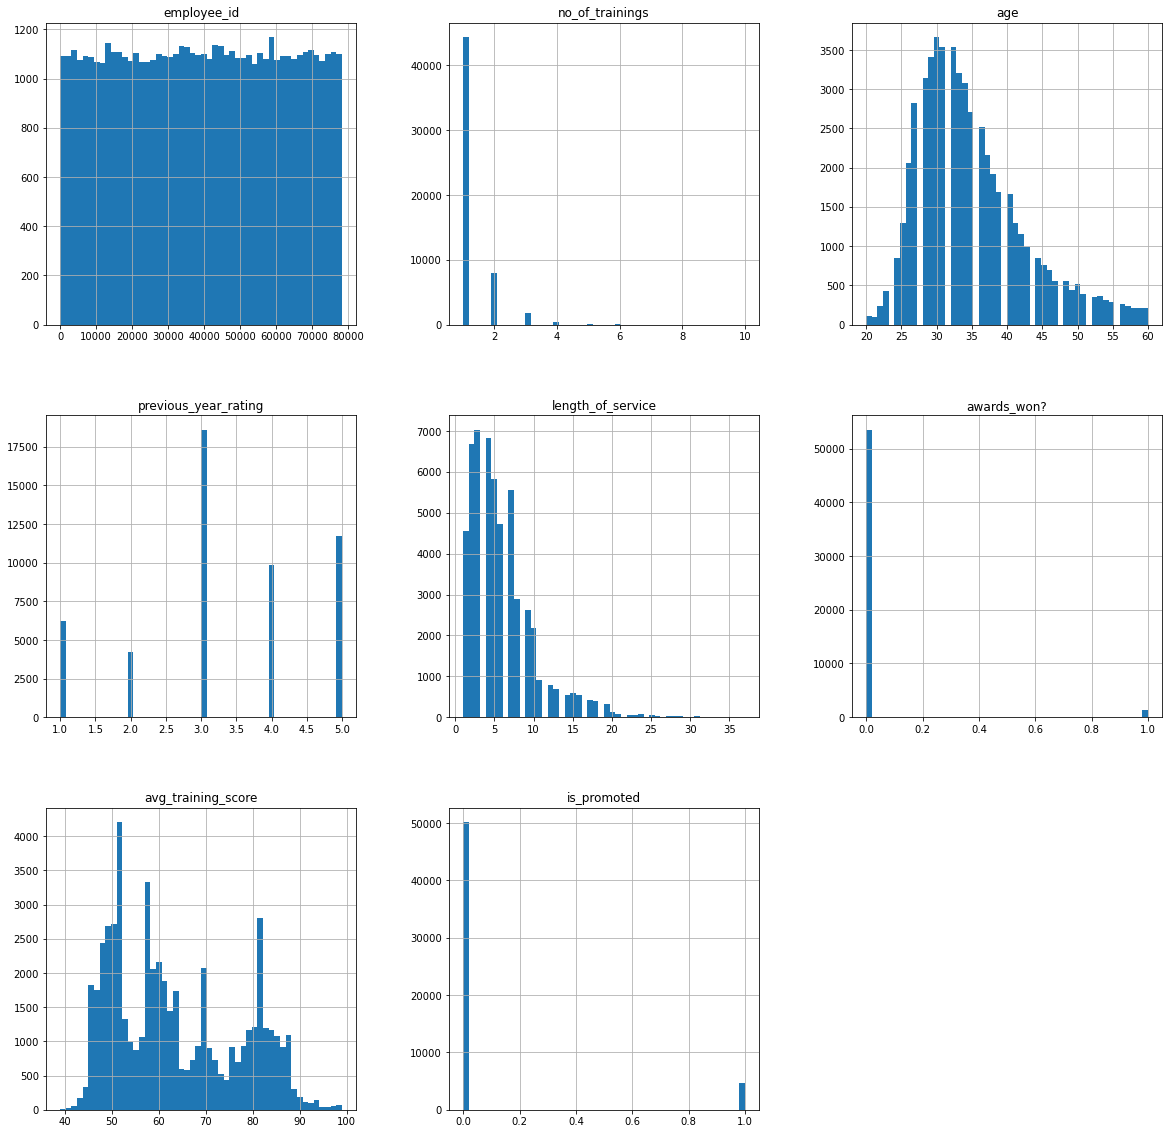

In [9]:
data.hist(figsize=(20,20), bins=50)

In [3]:
data['length_of_service'].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

### Age

Umur para karyawan kebanyakan berada pada usia 30 an tahun

### no_of_trainings

Dari grafik kebanyakan jumlah training yang dilakukan oleh para pegawai sebanyak 1 kali saja.

### previous_year_rating

Dari grafik kebanyakan pegawai mendapatkna rating 3 pada tahun sebelumnya.

### length_of_service

Pada grafik lama pengabdian para pegawai kebanyakan mengabdi selama 5 tahun

### awards_won?

pada grafik tersebut kebanyakan pegawai tidak mendapatkan penghargaan

### avg_training_score

kebanyakan nilai rata-rata training karyawan berada pada angka 50, 60, dan 80

In [10]:
groupby_target = data.groupby('is_promoted').mean()
groupby_target

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
is_promoted,,,,,,,
0,39187.520423,1.257639,34.844037,3.267911,5.879398,0.014180,62.647686
1,39285.092331,1.203299,34.372965,3.986140,5.716367,0.119751,71.325193


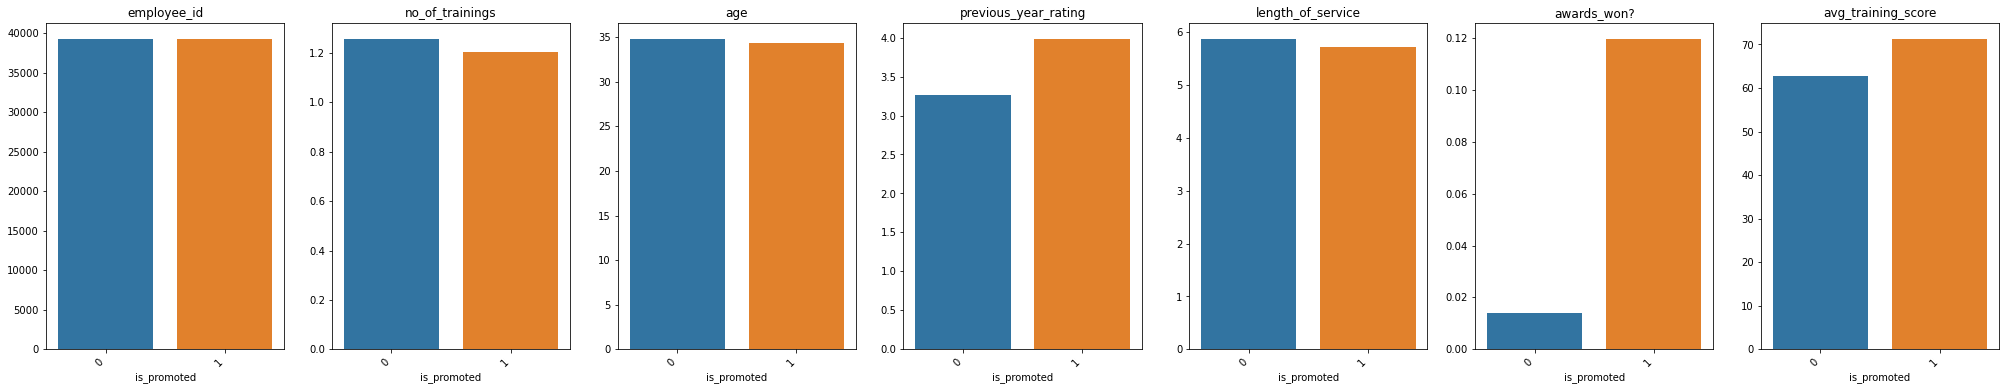

In [11]:
fig,axes=plt.subplots(1,7, figsize=(35,6))
axe= axes.ravel()
for i,col in enumerate(groupby_target.columns):
    sns.barplot(x=groupby_target[col].index, y=groupby_target[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

Tidak ada perbedaan yang signifikan antara pegawai dipromosikan dan yang tidak menurut rata-rata usia mereka, jumlah training dan lama waktu mereka bekerja.

Terdapat sedikit perbedaan pada rata-rata rating pada tahun sebelumnya dan rata-rata training score pada pegawai yang dipromosikan dan yang tidak.

Terdapat perbedaan yang sangat signifikan pada kolom awards_won? dimana pegawai yang dipromosikan kebanyakan pegawai yang pernah mendapatkan penghargaan dari perushaan. Sehingga dapat disimpulkan kolom tersebut sangat mempengaruhi target.

## Kolom Kategorikal

In [12]:
categorical_data = data[['department','region','education','recruitment_channel','gender']]

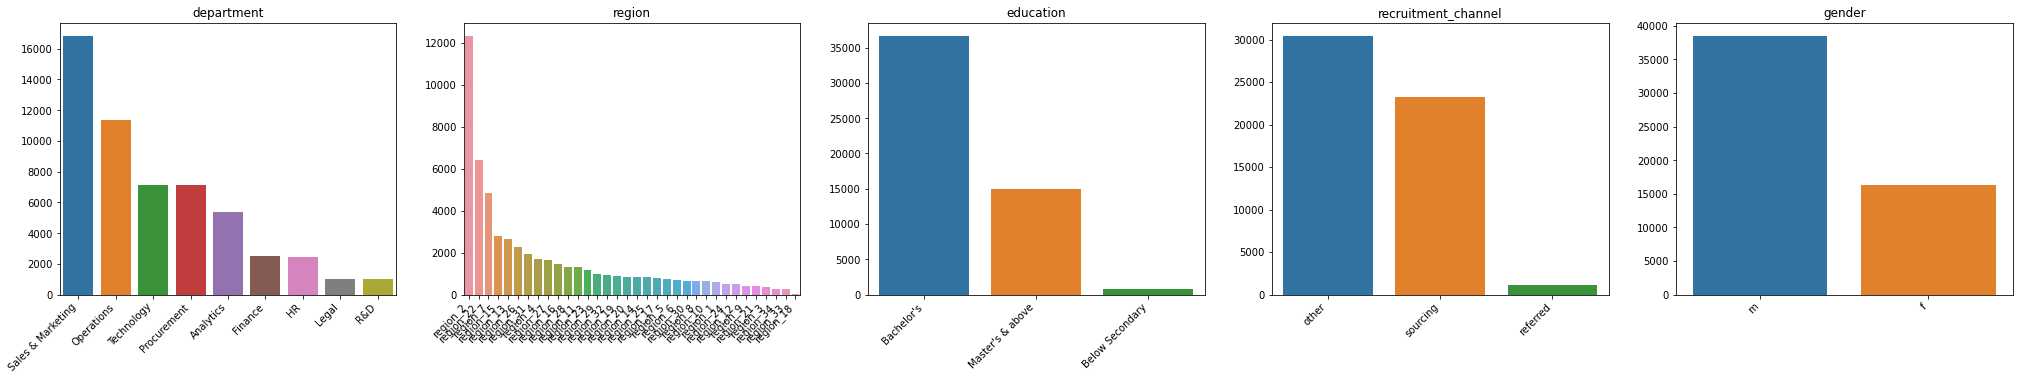

In [13]:
fig,axes=plt.subplots(ncols=5,figsize=(35,5))

for i,col in enumerate(categorical_data.columns):
    sns.barplot(x=categorical_data[col].value_counts().index, y=categorical_data[col].value_counts().values, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_title(col)

### Department

Terpadat 9 departemen pada perusahaan tersebut. Departement sales & Marketing memiliki pegawai yang paling banyak dibandingkan departemen lainnya, sementara itu departemen R&D merupakan departemen dengan jumlah pegawai yang paling sedikit.

### Region

Region banyak sekali kategori datanya dan kebanyakan pegawai tinggal di region 2 yang mungkin region tersebut dekat dengan lokasi perusahaan. 

### Education

Kebanyakan pegawai memiliki pendidikan hingga sarjana, diikuti oleh tingkat master & diatasnya lalu dibawah secondary. Secondary school setara dengan SMP atau SMA di Indonesia, jadi kemungkinan jika dibawah secondary maka pegawai tersebut hanya lulusan SD atau elementary. 

###### Sumber: https://www.ican-education.com/blog/mengenal-lebih-jauh-mengenai-secondary-school/

### recruitment_channel

recruitment_channel ini menginformasikan sumber darimana pegawait tersebut mendapatkan pekerjaan di perusahaan tersebut. Kebanyakan pegawai bekerja pada perusahaan tersebut melalui sourcing, yaitu perusahaan menerima kandidat pegawai dengan mencari kandidat pegawai tersebut dari situs misalnya Linkedin, Facebook, dll. Kolom ini memberikan informasi yang sangat sedikit karena kebanyakan pegawai tidak diketahui darimana mereka mendapat pekerjaan di perusahan tersebut karena kebanyakannya adalah other yang tidak diketahui sama sekali.

### Gender

Jumlah pegawai Male atau laki-laki lebih banyak dua kali lipat dari pegawai female atau perempuan

In [14]:
categorical_data['is_promoted']=data['is_promoted']

C:\Users\MUHAMA~1\AppData\Local\Temp/ipykernel_16076/2887266527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['is_promoted']=data['is_promoted']


In [15]:
categorical_data

,department,region,education,recruitment_channel,gender,is_promoted
0,Sales & Marketing,region_7,Master's & above,sourcing,f,0
1,Operations,region_22,Bachelor's,other,m,0
2,Sales & Marketing,region_19,Bachelor's,sourcing,m,0
3,Sales & Marketing,region_23,Bachelor's,other,m,0
4,Technology,region_26,Bachelor's,other,m,0
...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,sourcing,m,0
54804,Operations,region_27,Master's & above,other,f,0
54805,Analytics,region_1,Bachelor's,other,m,0
54806,Sales & Marketing,region_9,NaN,sourcing,m,0


c:\Users\Muhamad Afif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

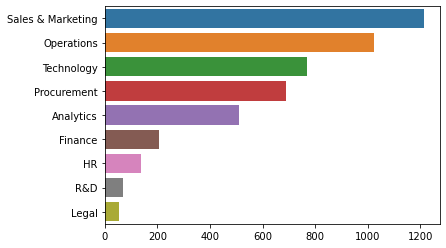

In [16]:
promoted_department = categorical_data[categorical_data['is_promoted']==1]['department'].value_counts()
sns.barplot(promoted_department.values,promoted_department.keys()) 

Pegawai yang berkesempatan untuk dipromosikan berasa dari departemen sales & marketing, dimana departemen tersebut juga merupakan departemen dengan pegawai terbanyak. 

c:\Users\Muhamad Afif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

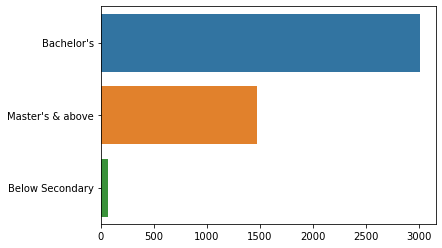

In [17]:
promoted_education = categorical_data[categorical_data['is_promoted']==1]['education'].value_counts()
sns.barplot(promoted_education.values,promoted_education.keys()) 

Sama seperti data keseluruhan, pegawai yang berkesempatan untuk promosi paling banyak tingkat pendidikannya sarjana dan diikuti ileh tingkat master & diatasnya.

c:\Users\Muhamad Afif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

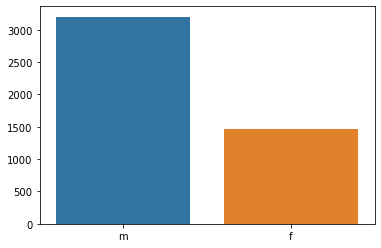

In [18]:
promoted_gender = categorical_data[categorical_data['is_promoted']==1]['gender'].value_counts()
sns.barplot(promoted_gender.keys(),promoted_gender.values) 

Sama seperti data keseluruhannya, pegawai yang memiliki kesempatan promosi didominasi oleh pegawai kaum Adam sementara pegawai kaum Hawa hanya kurang lebih setengahnya saja.

In [19]:
jumlah_gender = data['gender'].value_counts()
jumlah_gender

m    38496
f    16312
Name: gender, dtype: int64

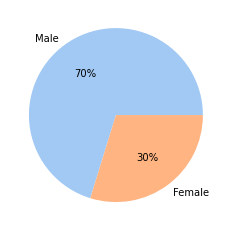

In [20]:
colors = sns.color_palette('pastel')[0:5]
labels = ['Male','Female']
plt.pie(jumlah_gender ,labels = labels,  colors = colors, autopct='%.0f%%')

plt.show()

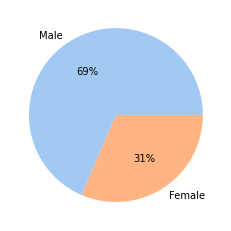

In [21]:

colors = sns.color_palette('pastel')[0:5]
labels = ['Male','Female']
plt.pie(promoted_gender ,labels = labels,  colors = colors, autopct='%.0f%%')

plt.show()

Persentase pegawai wanita sebesar 30% dan persentase wanita yang diberikan promosi sebanyak 31%, hanya berbeda 1% saja. Maka dari itu tidak ada perbesaan yang signifikan pada kolom gender untuk diberikannya promosi ataupun tidak diberikan promosi.

# 5. Data Preprocessing

In [22]:
data.rename({'awards_won?':'awards_won'},axis=1,inplace=True)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [23]:
data['awards_won'] = data['awards_won'].map({0:'No',
                               1: 'Yes'})

In [24]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [25]:
data['education'] = data['education'].map({'Below Secondary':0,
                               "Bachelor's": 1,
                               "Master's & above":2})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  float64
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  object 
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### Splitting Data

In [27]:
X = data.drop(['is_promoted'], axis=1)
y = data['is_promoted']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [28]:
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (43846, 12)
Test Size  :  (10962, 12)


Hasil splitting dengan ukuran Test Size 20% didapatkan X_train sebanyak 43838 baris dan X_test sebanyak 10960 baris

### Handling Outlier

In [29]:
def diagnostic_plots(X_train, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column], bins=30)
    plt.title(f'Distribution of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[column])
    plt.title(f'Boxplot of {column}')



    plt.show()
    skewness = X_train[column].skew(axis=0, skipna = True)
    print(f'Skewness of {column}=',skewness)

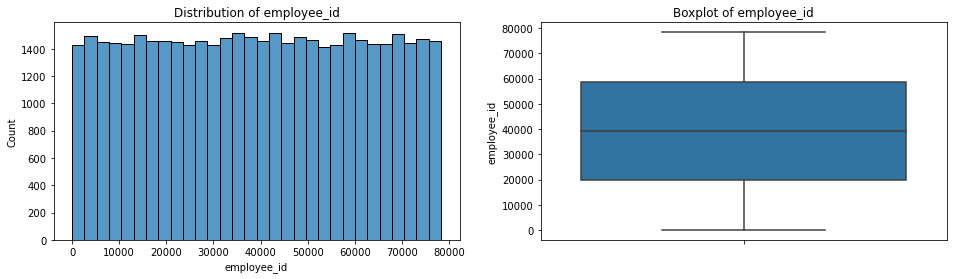

Skewness of employee_id= -0.0008058416464168495


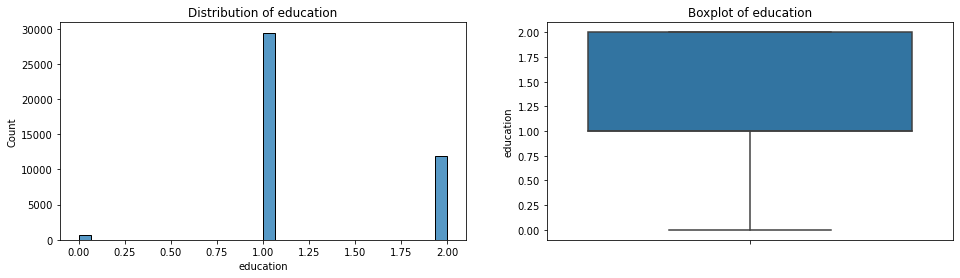

Skewness of education= 0.6156872521946432


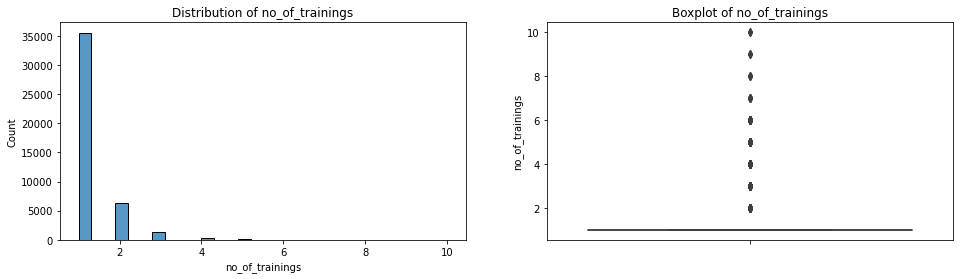

Skewness of no_of_trainings= 3.4334736031365565


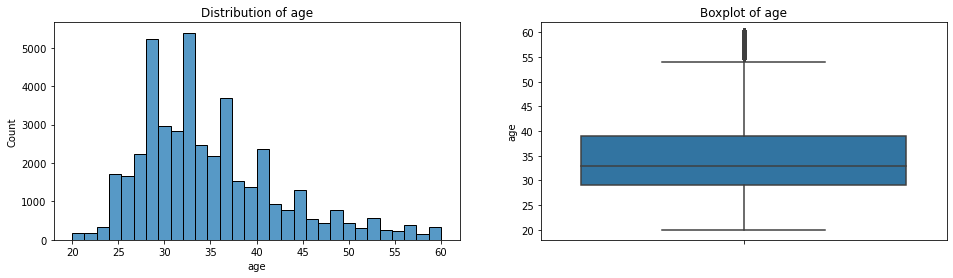

Skewness of age= 1.0094093166261657


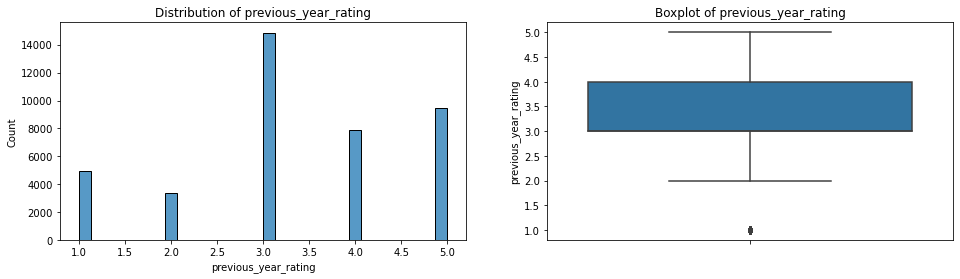

Skewness of previous_year_rating= -0.31233034402178145


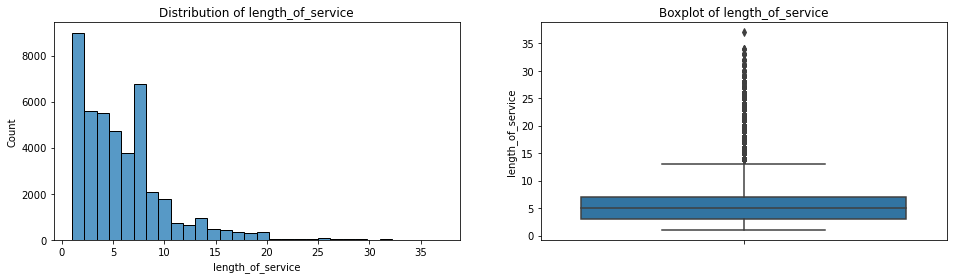

Skewness of length_of_service= 1.7532887284048622


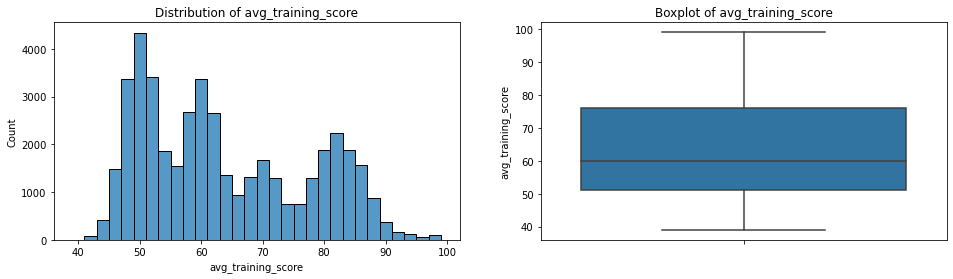

Skewness of avg_training_score= 0.4584599800607129


In [30]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     diagnostic_plots(X_train, column)

In [31]:
def check_outliers(data, column):
    skewness = data[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = data[column].mean() + 3 * data[column].std()
        lower_boundary = data[column].mean() - 3 * data[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
         lower_boundary = X_train[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = X_train[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

In [32]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     check_outliers(X_train, column)

['Normal']
Upper Boundary of employee_id: 106914.75683116363
Lower Boundary of employee_id: -28552.910779072226
Total Data Above Upper Boundary employee_id: 0
Total Data Below Lower Boundary employee_id: 0
% Data Above Upper Boundary employee_id: 0.0
% Data Below Lower Boundary employee_id: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of education: 3.5
Lower Boundary of education: -0.5
Total Data Above Upper Boundary education: 0
Total Data Below Lower Boundary education: 0
% Data Above Upper Boundary education: 0.0
% Data Below Lower Boundary education: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of no_of_trainings: 1.0
Lower Boundary of no_of_trainings: 1.0
Total Data Above Upper Boundary no_of_trainings: 8338
Total Data Below Lower Boundary no_of_trainings: 0
% Data Above Upper Boundary no_of_trainings: 19.016557

Dari informasi tersebut, maka akan dilakukan handling outlier sebagai berikut:

trimming: age

capping: length_of_service

ignoring: sisanya

kolom awards_won? tidak dilakukan handling karena kolom tersebut merupakan kolom kategorikal

In [33]:
print('X_train - Before Handling :', X_train.shape)
outlier_trimmer1 = OutlierTrimmer( capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['age'],
                   missing_values='ignore'
                   )

outlier_trimmer1.fit(X_train)

X_train = outlier_trimmer1.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (43846, 12)
X_train - After Handling :  (42717, 12)


Setelah di trimming, X_train memiliki 42713 baris yang sebelumnya 43838 baris atau berkurang sekitar 2.5% dari X_train awal

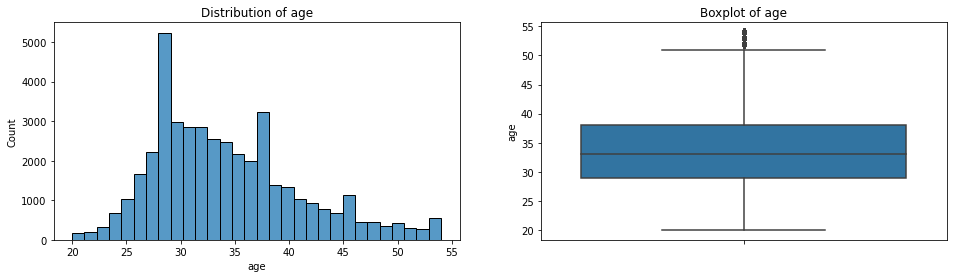

Skewness of age= 0.7578103101772127


In [34]:
trim_columns = ['age']
for column in trim_columns:
     diagnostic_plots(X_train, column)

Hasilnya distribusi feature age  masih skew dan masih ada outlier yang lolos.

In [35]:
print('X_train - Before Handling :', X_train.shape)
winsorizer = Winsorizer( capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['length_of_service'],
                   missing_values='ignore'
                   )

winsorizer.fit(X_train)

X_train = winsorizer.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (42717, 12)
X_train - After Handling :  (42717, 12)


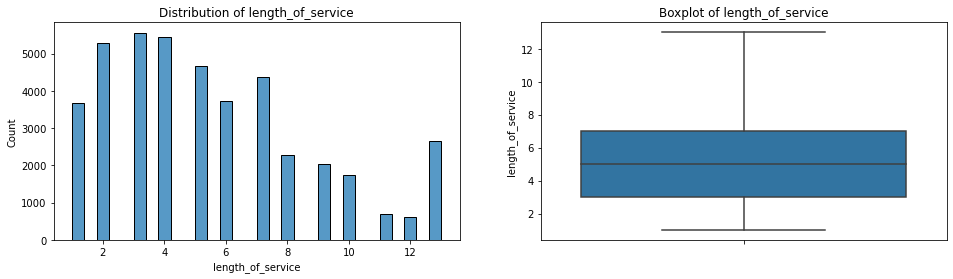

Skewness of length_of_service= 0.7230430113345402


In [36]:
capping_columns = ['length_of_service']
for column in capping_columns:
     diagnostic_plots(X_train, column)

Data masih berbentuk skew, tetapi tidak ada outlier yang tersisa pada kolom length_of_service

In [37]:
y_train = y_train[X_train.index]
y_train.shape

(42717,)

Jumlah baris y_train disamakan dengan jumlah baris X_train

### Handling Missing Values

In [38]:
X_test.isnull().sum()

employee_id               0
department                0
region                    0
education               530
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    780
length_of_service         0
awards_won                0
avg_training_score        0
dtype: int64

In [39]:
X_train['previous_year_rating'].skew()

-0.31338589895170393

kolom education merupakan kolom kategorik sehingga akan digunakan modus dari X_train untuk mengisi missing values tersebut

kolom previous_year_rating pada X-train berdistribusi Normal sehingga akan digunakan mean untuk mengisi missing values tersebut

In [40]:
X_test['education'].fillna(X_train['education'].mode()[0], inplace=True)

In [41]:
X_test['previous_year_rating'].fillna(X_train['previous_year_rating'].mean(), inplace=True)

In [42]:
X_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64

Tidak ada missing values pada X_test

In [43]:
X_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               1852
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3344
length_of_service          0
awards_won                 0
avg_training_score         0
dtype: int64

In [44]:
print(X_train['previous_year_rating'].mean())
print(X_train['education'].mode()[0])

3.3348741523378966
1.0


In [45]:
X_train['education'].fillna(X_train['education'].mode()[0], inplace=True)

In [46]:
X_train['previous_year_rating'].fillna(X_train['previous_year_rating'].mean(), inplace=True)

In [47]:
X_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64

Tidak ada lagi missing values pada X_train

In [48]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


Tidak ada missing values pada X_train dan X_test

### Feature Selection

Kolom employee_id tidak diperlukan karena kolom tersebut hanya menunjukkan identitas dari para pegawai.

In [49]:
X_train.drop(['employee_id'], axis=1, inplace=True)
X_test.drop(['employee_id'] ,axis=1, inplace=True)

Kolom recruitment_channel juga di drop karena hanya memberikan informasi yang sangat sedikit.

In [50]:
X_train.drop(['recruitment_channel'], axis=1, inplace=True)
X_test.drop(['recruitment_channel'] ,axis=1, inplace=True)

Kolom region di drop karena dirasa letak alamat para pegawai tidak berpengaruh kepada diberikannya promosi kepada pegawai.

In [51]:
X_train.drop(['region'], axis=1, inplace=True)
X_test.drop(['region'] ,axis=1, inplace=True)

Kolom department juga di drop karena dari hasil EDA departemen tempat para pegawai bekerja tidak berpengaruh pada diberikannya promosi kepada pegawai.

In [52]:
X_train.drop(['department'], axis=1, inplace=True)
X_test.drop(['department'] ,axis=1, inplace=True)

Kolom gender juga di drop karena dari hasil EDA departemen tempat para pegawai bekerja tidak berpengaruh pada diberikannya promosi kepada pegawai.

In [53]:
X_train.drop(['gender'], axis=1, inplace=True)
X_test.drop(['gender'] ,axis=1, inplace=True)

In [54]:
X_train_heatmap = X_train[['previous_year_rating', 'no_of_trainings', 'age', 'length_of_service', 'avg_training_score']]

<AxesSubplot:>

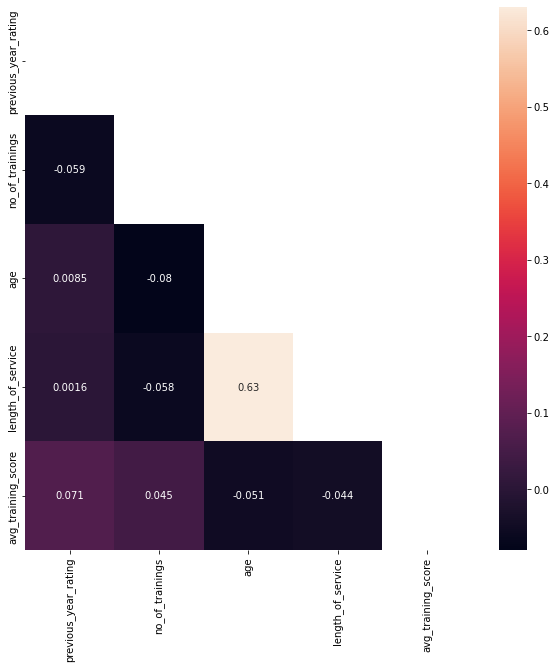

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_heatmap.corr(),annot=True, mask=np.triu(X_train_heatmap.corr()))

Semua kolom dihubungkan ke kolom previous_year_rating karena kolom ini memiliki korelasi yang paling tinggi terhadap target.

Walaupun jumlah training memiliki korelasi negatif, tetapi kolom ini tetap dirasa perlu.

In [56]:
X_train.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
20253,1.0,1,46,5.000000,7.0,No,43
28879,0.0,2,23,3.334874,1.0,No,77
9901,1.0,2,28,3.334874,1.0,No,89
38961,2.0,1,35,5.000000,3.0,No,58
3596,1.0,2,32,2.000000,3.0,No,47


### Split between numerical and categorical columns

In [57]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['education', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
Categorical Columns :  ['awards_won']


In [58]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

### Feature Scaling

In [59]:
def diagnostic_plots(data, column):
  skewness = data[column].skew(axis=0, skipna = True)
  print(f'Skewness of {column} =',skewness)

In [60]:
for column in num_columns:
     diagnostic_plots(X_train, column)

Skewness of education = 0.7013902206865691
Skewness of no_of_trainings = 3.3778250912521823
Skewness of age = 0.7578103101772127
Skewness of previous_year_rating = -0.3264218898232303
Skewness of length_of_service = 0.7230430113345402
Skewness of avg_training_score = 0.45809565814367437


Kebanyakan kolom berdistribusi skew maka akan digunakan MinMax Scaler 

In [61]:
X_train_num

,education,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
20253,1.0,1,46,5.000000,7.0,43
28879,0.0,2,23,3.334874,1.0,77
9901,1.0,2,28,3.334874,1.0,89
38961,2.0,1,35,5.000000,3.0,58
3596,1.0,2,32,2.000000,3.0,47
...,...,...,...,...,...,...
10376,1.0,1,28,3.000000,4.0,49
34949,1.0,2,30,3.000000,6.0,67
18417,1.0,1,41,3.000000,5.0,50
25940,1.0,1,34,3.000000,7.0,59


In [62]:
X_train_num_2= X_train_num.drop(columns=['education'])
X_test_num_2= X_test_num.drop(columns=['education'])
X_train_num

,education,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
20253,1.0,1,46,5.000000,7.0,43
28879,0.0,2,23,3.334874,1.0,77
9901,1.0,2,28,3.334874,1.0,89
38961,2.0,1,35,5.000000,3.0,58
3596,1.0,2,32,2.000000,3.0,47
...,...,...,...,...,...,...
10376,1.0,1,28,3.000000,4.0,49
34949,1.0,2,30,3.000000,6.0,67
18417,1.0,1,41,3.000000,5.0,50
25940,1.0,1,34,3.000000,7.0,59


In [63]:
X_train_edu = X_train_num[['education']]
X_test_edu= X_test_num[['education']]

In [64]:
scaler = MinMaxScaler()
scaler.fit(X_train_num_2)

X_train_num_scaled = scaler.transform(X_train_num_2)
X_test_num_scaled = scaler.transform(X_test_num_2)

X_train_num_scaled 

array([[0.        , 0.76470588, 1.        , 0.5       , 0.06666667],
       [0.11111111, 0.08823529, 0.58371854, 0.        , 0.63333333],
       [0.11111111, 0.23529412, 0.58371854, 0.        , 0.83333333],
       ...,
       [0.        , 0.61764706, 0.5       , 0.33333333, 0.18333333],
       [0.        , 0.41176471, 0.5       , 0.5       , 0.33333333],
       [0.        , 0.76470588, 0.5       , 0.08333333, 0.2       ]])

In [65]:
X_train_num_scaled = np.concatenate([X_train_num_scaled ,X_train_edu], axis=1)
X_test_num_scaled = np.concatenate([X_test_num_scaled , X_test_edu], axis=1)
X_train_num_scaled

array([[0.        , 0.76470588, 1.        , 0.5       , 0.06666667,
        1.        ],
       [0.11111111, 0.08823529, 0.58371854, 0.        , 0.63333333,
        0.        ],
       [0.11111111, 0.23529412, 0.58371854, 0.        , 0.83333333,
        1.        ],
       ...,
       [0.        , 0.61764706, 0.5       , 0.33333333, 0.18333333,
        1.        ],
       [0.        , 0.41176471, 0.5       , 0.5       , 0.33333333,
        1.        ],
       [0.        , 0.76470588, 0.5       , 0.08333333, 0.2       ,
        2.        ]])

### Feature Encoding

In [66]:
X_train_cat.head()

,awards_won
20253,No
28879,No
9901,No
38961,No
3596,No


In [67]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
X_train_cat_enc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Concat between Numerical Columns and Categorical Columns

In [68]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_train_final

array([[0.        , 0.76470588, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.11111111, 0.08823529, 0.58371854, ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.23529412, 0.58371854, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.61764706, 0.5       , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.41176471, 0.5       , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.76470588, 0.5       , ..., 2.        , 1.        ,
        0.        ]])

# 6. Model Definition

### Logistic Regression

In [69]:
log_reg = LogisticRegression(random_state=5)

### K-Nearest Neigbors

In [70]:
knn = KNeighborsClassifier()

### Naive Bayes

In [71]:
nb = GaussianNB()

### Decision Tree Classifier

In [72]:
tree = DecisionTreeClassifier(random_state=8)

# 7. Model Training

#### Logistic Regression

In [73]:
log_reg.fit(X_train_final, y_train)

LogisticRegression(random_state=5)

### K-Nearest Neighbor

In [74]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

### Naive Bayes

In [75]:
nb.fit(X_train_final, y_train)

GaussianNB()

### Decision Tree Classifier

In [76]:
tree.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=8)

# 8. Model Evaluation

### Logistic Regression

In [77]:
y_pred_train_logistic_imbalanced = log_reg.predict(X_train_final)

In [78]:

print(classification_report(y_train, y_pred_train_logistic_imbalanced))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     39062
           1       0.73      0.08      0.14      3655

    accuracy                           0.92     42717
   macro avg       0.82      0.54      0.55     42717
weighted avg       0.90      0.92      0.89     42717



Kategori 0 merupakan pegawai yang tidak mendapatkan promosi, sementara kategori 1 adalah pegawai yang mendapatkan promosi. Pada kasus ini kategori 1 akan digunakan sebagai sudut pandang

- True positif apabila seorang pegawai kenyataannya mendapatkan promosi dan hasil prediksi model menyatakan bahwa pegawai tersebut mendapatkan promosi. 
- True Negative apabila seorang pegawai kenyataannya tidak mendapatkan promosi dan hasil prediksi model menyatakan bahwa pegawai tersebut tidak mendapatkan promosi.
- False Negative apabila seorang pegawai kenyatannya mendapatkan promosi, tetapi hasil prediksi model menyatakan bahwa pegawai tersebut tidak mendapatkan promosi.
- False Positive apabila seorang pegawai kenyatannya tidak mendapatkan promosi, tetapi hasil prediksi model menyatakan bahwa pegawai tersebut mendapatkan promosi.

Dari uraian diatas dinyatakan bahwa false positive lebih berbahaya dibandingkan false negative. Hal ini karena ditakutkan pegawai yang tidak berkompeten dapat diprediksi bahwa pegawai tersebut mendapatkan promosi jabatan. Hal ini sangat berbahaya bagi perusahaan karena ditakutkan apabila pegawai yang tidak berkompeten tersebut memimpin suatu divisi di perusahaan, maka akibatnya bisa fatal bagi perusahaan tersebut.

Karena false positive berhubungan dengan precision, maka nilai yang akan dilihat yaitu nilai precision pada categori 1

Pada pemodelan Logistic Regression pada Data imbalance (berada dibawah) nilai precision pada kategori 1 bernilai 73% 

### K-Nearest Neighbors

In [79]:
y_pred_train_knn_imbalanced = knn.predict(X_train_final)

In [80]:
print(classification_report(y_train, y_pred_train_knn_imbalanced))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     39062
           1       0.76      0.22      0.34      3655

    accuracy                           0.93     42717
   macro avg       0.85      0.60      0.65     42717
weighted avg       0.92      0.93      0.91     42717



Pada pemodelan Logistic Regression pada Data imbalance (berada dibawah) nilai precision pada kategori 1 bernilai 76%

### Naive Bayes

In [81]:
y_pred_train_nb_imbalanced = nb.predict(X_train_final)

In [82]:
print(classification_report(y_train, y_pred_train_nb_imbalanced))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     39062
           1       0.44      0.12      0.19      3655

    accuracy                           0.91     42717
   macro avg       0.68      0.55      0.57     42717
weighted avg       0.88      0.91      0.89     42717



Pada pemodelan Logistic Regression pada Data imbalance (berada dibawah) nilai precision pada kategori 1 bernilai 44%

### Decision Tree Classifier

In [83]:
y_pred_train_tree_imbalanced = tree.predict(X_train_final)

In [84]:
print(classification_report(y_train, y_pred_train_tree_imbalanced))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     39062
           1       0.99      0.69      0.81      3655

    accuracy                           0.97     42717
   macro avg       0.98      0.84      0.90     42717
weighted avg       0.97      0.97      0.97     42717



SamPada pemodelan Logistic Regression pada Data imbalance (berada dibawah) nilai precision pada kategori 1 bernilai 99%

Dari keempat model tersebut, model Decision Tree Classifier memiliki nilai akurasi tertinggi pada data balance. Tetapi hal tersebut perlu dilakukan cross validation untuk lebih membuktikannya.

## Cross Validation

### Logistic Regression

In [85]:


precision_train_cross_val = cross_val_score(log_reg, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="precision")

print('Precision - All - Cross Validation  : ', precision_train_cross_val)
print('Precision - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', precision_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (precision_train_cross_val.mean()- precision_train_cross_val.std()) , '-', (precision_train_cross_val.mean()+ precision_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.69924812 0.74615385 0.73880597]
Precision - Mean - Cross Validation :  0.728069312201284
Precision - Std - Cross Validation  :  0.020599249943791427
Precision - Range of Test-Set       :  0.7074700622574925 - 0.7486685621450755


### K-Nearest Neighbors

In [86]:
precision_train_cross_val = cross_val_score(knn, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="precision")

print('Precision - All - Cross Validation  : ', precision_train_cross_val)
print('Precision - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', precision_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (precision_train_cross_val.mean()-precision_train_cross_val.std()) , '-', (precision_train_cross_val.mean()+precision_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.52531646 0.53395062 0.49659864]
Precision - Mean - Cross Validation :  0.5186219041453118
Precision - Std - Cross Validation  :  0.015966743088257854
Precision - Range of Test-Set       :  0.502655161057054 - 0.5345886472335697


### Naive Bayes

In [87]:
precision_train_cross_val = cross_val_score(nb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="precision")

print('Precision - All - Cross Validation  : ', precision_train_cross_val)
print('Precision - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', precision_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (precision_train_cross_val.mean()-precision_train_cross_val.std()) , '-', (precision_train_cross_val.mean()+precision_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.42942943 0.46745562 0.42397661]
Precision - Mean - Cross Validation :  0.44028721963944634
Precision - Std - Cross Validation  :  0.01933950794857215
Precision - Range of Test-Set       :  0.4209477116908742 - 0.4596267275880185


### Decision Tree Classifier

In [88]:
precision_train_cross_val = cross_val_score(tree, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="precision")

print('Precision - All - Cross Validation  : ', precision_train_cross_val)
print('Precision - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', precision_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (precision_train_cross_val.mean()-precision_train_cross_val.std()) , '-', (precision_train_cross_val.mean()+precision_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.25597874 0.25420875 0.24590164]
Precision - Mean - Cross Validation :  0.252029711934265
Precision - Std - Cross Validation  :  0.00439303764818828
Precision - Range of Test-Set       :  0.24763667428607672 - 0.25642274958245326


Model Logistic Regression merupakan model yang memiliki rata-rata akurasi tertinggi dibandingkan model lainnya pada cross validation

### Prediksi X_test menggunakan Model Terbaik

In [89]:
y_pred_test = log_reg.predict(X_test_final)

In [90]:
print('Classification Report : \n', classification_report(y_test,y_pred_test), '\n')

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10016
           1       0.72      0.07      0.12       946

    accuracy                           0.92     10962
   macro avg       0.82      0.53      0.54     10962
weighted avg       0.90      0.92      0.88     10962
 



## Hyperparameter Tunning

In [91]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01]
multi_class = ['auto', 'ovr', 'multinomial']
max_iter = [int(x) for x in np.linspace(100, 1000, 5)]
random_grid = {'penalty':penalty,
               'C':C,
               'multi_class':multi_class,
               'max_iter':max_iter
               }
random_grid

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'multi_class': ['auto', 'ovr', 'multinomial'],
 'max_iter': [100, 325, 550, 775, 1000]}

In [92]:
logreg_gridcv = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=random_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

logreg_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


c:\Users\Muhamad Afif\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
750 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Muhamad Afif\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Muhamad Afif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Muhamad Afif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 325, 550, 775, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=2)

In [93]:
logreg_gridcv.best_params_

{'C': 1.0, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2'}

In [94]:
logreg_gridcv_best = logreg_gridcv.best_estimator_

In [95]:
y_pred_test = logreg_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

Accuracy - Test Set   :  0.9172596241561759 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10016
           1       0.72      0.07      0.12       946

    accuracy                           0.92     10962
   macro avg       0.82      0.53      0.54     10962
weighted avg       0.90      0.92      0.88     10962
 



## Membuat Pipeline

In [96]:
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, LogisticRegression())

In [97]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['education',
                                                   'no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['awards_won'])])),
                ('logisticregression', LogisticRegression())])

In [98]:
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10016
           1       0.72      0.07      0.12       946

    accuracy                           0.92     10962
   macro avg       0.82      0.53      0.54     10962
weighted avg       0.90      0.92      0.88     10962



In [ ]:
import pickle

# 10. Model Inference

In [99]:
data_inf= pd.read_csv('test.csv')

In [100]:
data_inf.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [101]:
data_inf.rename({'awards_won?':'awards_won'},axis=1,inplace=True)
data_inf.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [102]:
data_inf['awards_won'] = data_inf['awards_won'].map({0:'No',
                               1: 'Yes'})

In [103]:
data_inf['education'] = data_inf['education'].map({'Below Secondary':0,
                               "Bachelor's": 1,
                               "Master's & above":2})

In [104]:
data_inf

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,8724,Technology,region_26,1.0,m,sourcing,1,24,NaN,1,No,77
1,74430,HR,region_4,1.0,f,other,1,31,3.0,5,No,51
2,72255,Sales & Marketing,region_13,1.0,m,other,1,31,1.0,4,No,47
3,38562,Procurement,region_2,1.0,f,other,3,31,2.0,9,No,65
4,64486,Finance,region_29,1.0,m,sourcing,1,30,4.0,7,No,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,0.0,m,sourcing,1,24,3.0,1,No,61
23486,25600,Technology,region_25,1.0,m,sourcing,1,31,3.0,7,No,74
23487,45409,HR,region_16,1.0,f,sourcing,1,26,4.0,4,No,50
23488,1186,Procurement,region_31,1.0,m,sourcing,3,27,NaN,1,No,70


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  float64
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  object 
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [106]:
data_inf.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won                 0
avg_training_score         0
dtype: int64

In [107]:
data_inf['previous_year_rating'].fillna(3.3348741523378966, inplace=True)

In [108]:
data_inf['education'].fillna(1.0, inplace=True)

In [109]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]
data_inf_num

,education,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,1.0,1,24,3.334874,1,77
1,1.0,1,31,3.000000,5,51
2,1.0,1,31,1.000000,4,47
3,1.0,3,31,2.000000,9,65
4,1.0,1,30,4.000000,7,61
...,...,...,...,...,...,...
23485,0.0,1,24,3.000000,1,61
23486,1.0,1,31,3.000000,7,74
23487,1.0,1,26,4.000000,4,50
23488,1.0,3,27,3.334874,1,70


In [110]:
data_inf_num_2= data_inf_num.drop(columns=['education'])
data_inf_num_2

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,1,24,3.334874,1,77
1,1,31,3.000000,5,51
2,1,31,1.000000,4,47
3,3,31,2.000000,9,65
4,1,30,4.000000,7,61
...,...,...,...,...,...
23485,1,24,3.000000,1,61
23486,1,31,3.000000,7,74
23487,1,26,4.000000,4,50
23488,3,27,3.334874,1,70


In [111]:
data_inf_edu = data_inf_num[['education']]
data_inf_edu

,education
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
23485,0.0
23486,1.0
23487,1.0
23488,1.0


In [112]:
data_inf_num_scaled = scaler.transform(data_inf_num_2)
data_inf_num_scaled

array([[0.        , 0.11764706, 0.58371854, 0.        , 0.63333333],
       [0.        , 0.32352941, 0.5       , 0.33333333, 0.2       ],
       [0.        , 0.32352941, 0.        , 0.25      , 0.13333333],
       ...,
       [0.        , 0.17647059, 0.75      , 0.25      , 0.18333333],
       [0.22222222, 0.20588235, 0.58371854, 0.        , 0.51666667],
       [0.22222222, 0.58823529, 1.        , 0.33333333, 0.83333333]])

In [113]:
data_inf_num_scaled = np.concatenate([data_inf_num_scaled , data_inf_edu], axis=1)
data_inf_num_scaled

array([[0.        , 0.11764706, 0.58371854, 0.        , 0.63333333,
        1.        ],
       [0.        , 0.32352941, 0.5       , 0.33333333, 0.2       ,
        1.        ],
       [0.        , 0.32352941, 0.        , 0.25      , 0.13333333,
        1.        ],
       ...,
       [0.        , 0.17647059, 0.75      , 0.25      , 0.18333333,
        1.        ],
       [0.22222222, 0.20588235, 0.58371854, 0.        , 0.51666667,
        1.        ],
       [0.22222222, 0.58823529, 1.        , 0.33333333, 0.83333333,
        2.        ]])

In [114]:
data_inf_cat_enc = encoder.transform(data_inf_cat).toarray()
data_inf_cat_enc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [115]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
data_inf_final

array([[0.        , 0.11764706, 0.58371854, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.32352941, 0.5       , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.32352941, 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.17647059, 0.75      , ..., 1.        , 1.        ,
        0.        ],
       [0.22222222, 0.20588235, 0.58371854, ..., 1.        , 1.        ,
        0.        ],
       [0.22222222, 0.58823529, 1.        , ..., 2.        , 1.        ,
        0.        ]])

In [116]:
y_pred_inf = log_reg.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['is_promoted - Prediction'])
y_pred_inf_df

,is_promoted - Prediction
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [117]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted - Prediction
0,8724,Technology,region_26,1.0,m,sourcing,1,24,3.334874,1,No,77,0
1,74430,HR,region_4,1.0,f,other,1,31,3.000000,5,No,51,0
2,72255,Sales & Marketing,region_13,1.0,m,other,1,31,1.000000,4,No,47,0
3,38562,Procurement,region_2,1.0,f,other,3,31,2.000000,9,No,65,0
4,64486,Finance,region_29,1.0,m,sourcing,1,30,4.000000,7,No,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,0.0,m,sourcing,1,24,3.000000,1,No,61,0
23486,25600,Technology,region_25,1.0,m,sourcing,1,31,3.000000,7,No,74,0
23487,45409,HR,region_16,1.0,f,sourcing,1,26,4.000000,4,No,50,0
23488,1186,Procurement,region_31,1.0,m,sourcing,3,27,3.334874,1,No,70,0


# 10. Pengambilan Keputusan

- Pemodelan ini bertujuan untuk memprediksi apakah suatu pegawai dapat mendapatkan promosi jawaban di suatu perusahaan
- Digunakan 7 fitur yaitu education, jumlah training, umur, rating yahun sebelumnya, lama kerja, pernah dapat penghargaa, dan nilai rata-rata trining
- didapatkan nilai presisi karena pada kasus ini presisi rendah lebih berbahay maka fokus utamanya pada presisi
- Model yang terbaik dari cross validation adalah model Logistic Regression dengan rata-rata presisi 72%